In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [42]:
data_dt=pd.read_csv('/Users/mbp/Documents/DDS/DS/ML/AS2/heart_failure_clinical_records_dataset.csv')
data_dt

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# RF

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [44]:
params = {
    "max_depth": [2,3,5,7,9,10,11,12,15,17,20],
    "min_samples_leaf": [1,2,3,4,5,7,8,9,10,20,50,100,500],
    'n_estimators': [5,10,12,13,14,15,16,20,25,30,50,100]
}

In [45]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [46]:
y=data_dt.pop('DEATH_EVENT')
X=data_dt

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [48]:
%%time
clf = grid_search.fit(X_train, y_train)
clf

Fitting 5 folds for each of 1716 candidates, totalling 8580 fits


/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to

CPU times: user 1.98 s, sys: 306 ms, total: 2.29 s
Wall time: 52.6 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 9, 10, 11, 12, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 8, 9, 10, 20,
                                              50, 100, 500],
                         'n_estimators': [5, 10, 12, 13, 14, 15, 16, 20, 25, 30,
                                          50, 100]},
             scoring='accuracy', verbose=1)

In [49]:
grid_search.best_score_

0.8868794326241135

In [50]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=42)

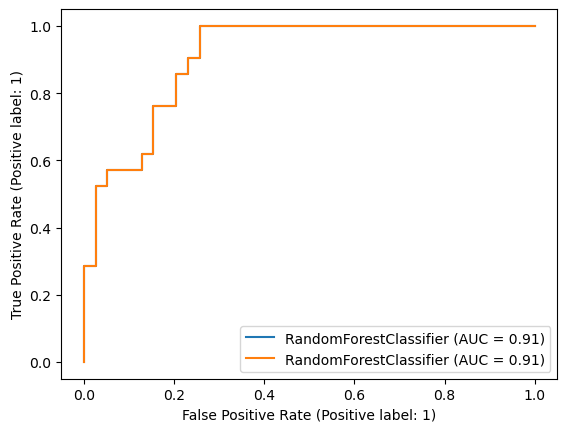

In [51]:
from sklearn.metrics import RocCurveDisplay 
# plot_roc_curve(rf_best, X_train, y_train) # plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead

svc_disp = RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rf_best, X_test, y_test, ax=svc_disp.ax_)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [53]:
evaluate_model(rf_best)

Train Accuracy : 0.8828451882845189
Train Confusion Matrix:
[[155   9]
 [ 19  56]]
--------------------------------------------------
Test Accuracy : 0.7833333333333333
Test Confusion Matrix:
[[35  4]
 [ 9 12]]


In [54]:
rf_best.feature_importances_

array([0.07011038, 0.00235612, 0.0218887 , 0.00131886, 0.15784953,
       0.        , 0.04227606, 0.17806214, 0.07129188, 0.00353846,
       0.00290771, 0.44840015])

In [55]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [56]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
11,time,0.448400
7,serum_creatinine,0.178062
4,ejection_fraction,0.157850
8,serum_sodium,0.071292
0,age,0.070110
6,platelets,0.042276
2,creatinine_phosphokinase,0.021889
9,sex,0.003538
10,smoking,0.002908
1,anaemia,0.002356


In [61]:
from sklearn.tree import export_graphviz
import graphviz

rf_best = grid_search.best_estimator_
for i in range(len(rf_best)):
    dot_data= export_graphviz(rf_best[i], out_file = None,
                            feature_names = X.columns,
                            class_names = ['0', '1'],
                            filled = True, rounded = True,
                            special_characters = True, impurity = True)

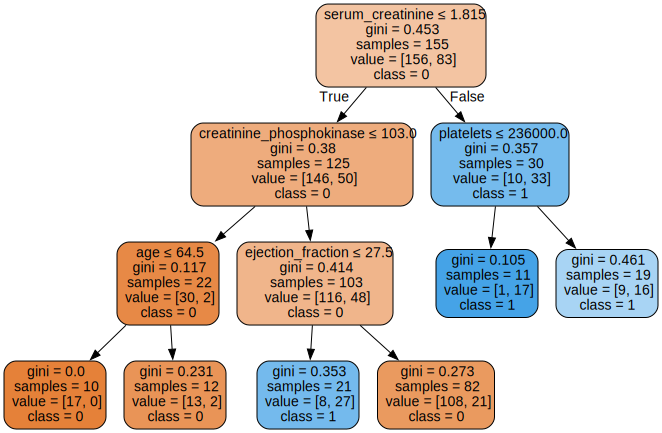

In [62]:
graph = graphviz.Source(dot_data, format='png')
graph

In [63]:
y_pred = clf.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7833333333333333

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_test, y_pred)
precision

0.75

In [66]:
recall = recall_score(y_test, y_pred)
recall

0.5714285714285714

In [67]:
f1 = f1_score(y_test, y_pred)
f1

0.6486486486486486

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
dt = DecisionTreeClassifier(random_state=42)

In [70]:
params = {
    "max_depth": [2,3,4,5,7,9,10,12,15,17,20],
    "min_samples_leaf": [1,2,3,4,5,7,8,9,10,20,50,100,500]
}

In [71]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [72]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 143 candidates, totalling 715 fits


/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to

CPU times: user 220 ms, sys: 83.5 ms, total: 303 ms
Wall time: 1.86 s


/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10, 12, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 8, 9, 10, 20,
                                              50, 100, 500]},
             scoring='accuracy', verbose=1)

In [73]:
grid_search.best_score_

0.8577127659574468

In [74]:
dt_best = grid_search.best_estimator_
dt_best


DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

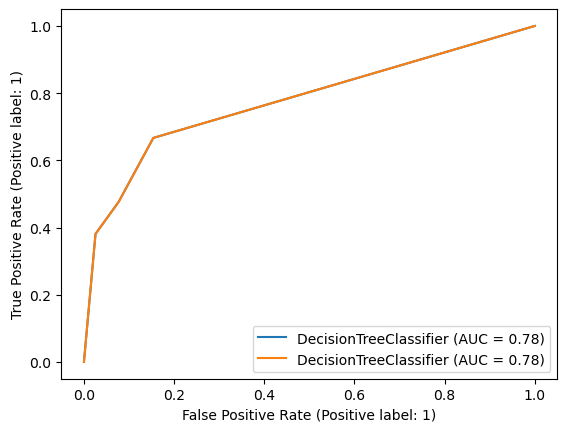

In [76]:
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(dt_best, X_train, y_train)
# plt.show()

from sklearn.metrics import RocCurveDisplay 

svc_disp = RocCurveDisplay.from_estimator(dt_best, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(dt_best, X_test, y_test, ax=svc_disp.ax_)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [78]:
evaluate_model(dt_best)

Train Accuracy : 0.8661087866108786
Train Confusion Matrix:
[[157   7]
 [ 25  50]]
--------------------------------------------------
Test Accuracy : 0.7666666666666667
Test Confusion Matrix:
[[36  3]
 [11 10]]


In [79]:
from sklearn.tree import export_graphviz
import graphviz

In [80]:
dot_data= export_graphviz(dt_best, out_file = None,
                          feature_names = X.columns,
                          class_names = ['0', '1'],
                          filled = True, rounded = True,
                          special_characters = True, impurity = True)

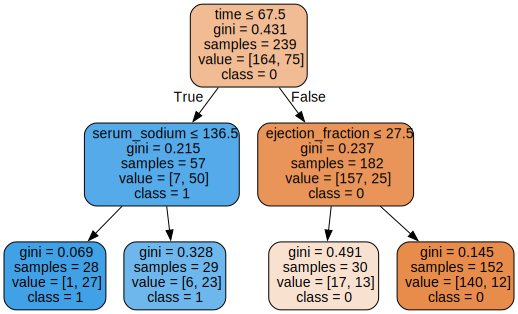

In [81]:
graph = graphviz.Source(dot_data, format='png')
graph